In [10]:
import matplotlib.pyplot as plt
import numpy as np

Write a computer program that takes as input an initial condition $y_0$, an initial time $t_0$, a step-size $∆t$, a final time $t_f$ and a function $f$ (which takes two inputs: a vector $y$ and a scalar $t$). The output of this program should be a list of vectors: $[y_0, y_1, y_2, \ldots]$ appproximating the solution to the differential equation at times $t_n, n = 0, 1, 2,\ldots$.

In [42]:
def rk4(f, y0, t0, dt, tf):
    t_list = list()
    y_list = list()
    t_list.append(t0)
    y_list.append(y0)
    yn = y0;
    tn = t0;
    while (tn  < tf):
        k1 = f(yn, tn)
        k2 = f(yn + dt*k1/2, tn + dt / 2)
        k3 = f(yn + dt * k2/2, tn + dt / 2)
        k4 = f(yn + dt * k3, tn + dt)
        tn += dt
        yn = yn + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        t_list.append(tn)
        y_list.append(yn)
        if (tn+dt > tf):
            dt = tf - tn
    return t_list, y_list

$y'' + y = 0;$

So $u = y$

   $v = y'$,

then $u' =  v$,

and $v' = -u$.

In [43]:
def f(y, t):
    return np.array([y[1], -y[0]])

In [44]:
t, y = rk4(f, [1,0], 0., 0.1, 10)

In [45]:
y = np.array(y)
exact = np.cos(t)

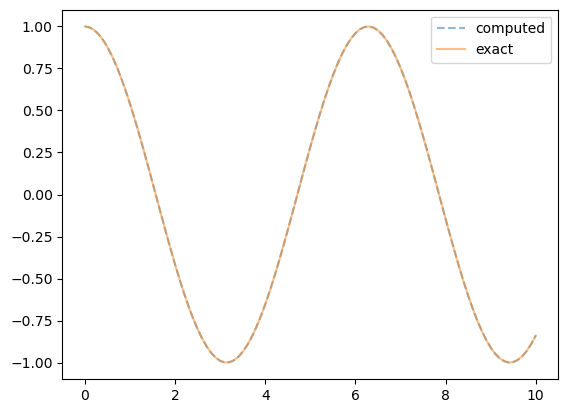

In [46]:
plt.plot(t, y[:,0], '--', label='computed', alpha=0.5)
plt.plot(t, np.cos(t),    label='exact',    alpha=0.5)
plt.legend()

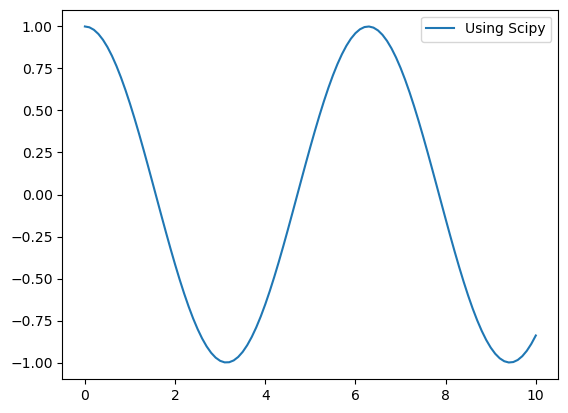

In [57]:
import scipy.integrate
out = scipy.integrate.odeint(f, [1,0], np.linspace(0,10, 101))
plt.plot(np.linspace(0, 10, 101), out[:,0], label='Using Scipy')
plt.legend()

In [131]:
def checkConRate(dt_list):
    f_errors = list()
    s_errors = list()
    for dt in dt_list:
        print("dt = "+str(dt)+";", end='')
        t, y_f = rk4(f, [1,0], 0., dt, 10)
        y_f = np.array(y_f)
        y_t = scipy.integrate.odeint(f, [1,0], t)
        exact = np.cos(t)
        f_e = np.max(y_f[:,0] - exact)
        s_e = np.max(y_t[:,0] - exact)
        f_errors.append(f_e)
        s_errors.append(s_e)
        print("Errors = ", f_e, s_e)
    return np.array(f_errors), np.array(s_errors)

dt = 1.0;Errors =  0.0694416711864837 1.5316112925156666e-07
dt = 0.5623413251903491;Errors =  0.006955003827962325 1.692797844121685e-07
dt = 0.31622776601683794;Errors =  0.00068071837628364 1.7724396883522786e-07
dt = 0.1778279410038923;Errors =  6.707042113196504e-05 1.7686202608002688e-07
dt = 0.1;Errors =  6.6602142850535895e-06 1.7720945022503543e-07
dt = 0.05623413251903491;Errors =  6.634863691235005e-07 1.7756521508704992e-07
dt = 0.03162277660168379;Errors =  6.618943443337244e-08 1.7773899985140673e-07
dt = 0.01778279410038923;Errors =  6.6092996631184064e-09 1.7769668653189186e-07
dt = 0.01;Errors =  6.602874635941447e-10 1.7763446624741164e-07
dt = 0.005623413251903491;Errors =  6.612468905764501e-11 1.7750490088896953e-07
dt = 0.0031622776601683794;Errors =  6.4271366007062625e-12 1.763176218916307e-07
dt = 0.0017782794100389228;Errors =  7.353562203604724e-13 1.325232942273047e-07
dt = 0.001;Errors =  1.0610679002098777e-12 7.08066710819466e-08
dt = 0.000562341325190349

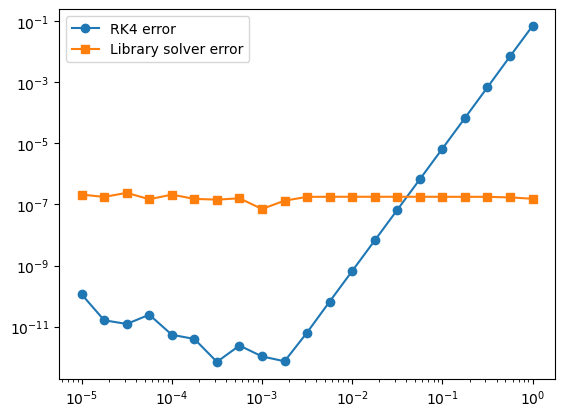

In [132]:
dt_list = np.logspace(-5, 0, 21)
dt_list = np.flip(dt_list)
f_e, s_e = checkConRate(dt_list)
plt.loglog(dt_list, f_e, 'o-', label="RK4 error")
plt.loglog(dt_list, s_e, 's-', label="Library solver error")
plt.legend()